In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn as sns
from scipy.stats import gamma, boxcox
from scipy import stats

### folder access path setup

In [2]:
ds_path = os.getcwd().removesuffix('notebook\\eda')+'datasets\\'
artifacts_path = os.getcwd().removesuffix('notebook\\eda')+'artifacts\\'
os.makedirs(artifacts_path, exist_ok=True)
we_path = ds_path + 'we.csv'
age_path = ds_path + 'age.csv'
fr_path = ds_path + 'fr.csv'
gdp_path = ds_path + 'gdp.csv'

### Dataset Loading

In [3]:
we, fr, gdp, age = pd.read_csv(we_path), pd.read_csv(fr_path), pd.read_csv(gdp_path), pd.read_csv(age_path)

## Data preprocessing

column renaming for faster access

In [4]:
we.rename(columns={'Combined - average years of education for 15-64 years female youth and adults':'we_avg_yr'},inplace=True)
fr.rename(columns={'Fertility rate - Sex: all - Age: all - Variant: estimates':'fr'},inplace=True)
gdp.rename(columns={'GDP, PPP (constant 2017 international $)':'gdp_ppp'},inplace=True)
age.rename(columns={'Median age - Sex: all - Age: all - Variant: estimates':'median_age'},inplace=True)

### Determining the approporate Year Range to pick the data

In [5]:
year_min, year_max = max(we['Year'].min(),fr['Year'].min(),gdp['Year'].min(),age['Year'].min()), min(we['Year'].max(),fr['Year'].max(),gdp['Year'].max(),age['Year'].max())

In [6]:
year_min, year_max

(np.int64(1990), np.int64(2022))

In [7]:
countries = ['United States', 'India', 'Germany']
all_years = { i for i in range(year_min, year_max+1)}

### we Missing Years

In [8]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(we[we['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### FR Missing Years

In [9]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(fr[fr['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### GDP Missing Years

In [10]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(gdp[gdp['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Filtering DFs wrt. countries

In [11]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(age[age['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Filtering records for defined countries and years

In [12]:
filtered_we = we[we['Entity'].isin(countries) & we['Year'].isin(all_years)]
filtered_fr = fr[fr['Entity'].isin(countries) & fr['Year'].isin(all_years)]
filtered_gdp = gdp[gdp['Entity'].isin(countries) & gdp['Year'].isin(all_years)]
filtered_age = age[age['Entity'].isin(countries) & age['Year'].isin(all_years)]

In [13]:
filtered_we = filtered_we[['Entity','Year','we_avg_yr']]
filtered_fr = filtered_fr[['Entity','Year','fr']]
filtered_gdp = filtered_gdp[['Entity','Year','gdp_ppp']]
filtered_age = filtered_age[['Entity','Year','median_age']]

In [14]:
filtered_gdp['gdp_ppp']=filtered_gdp['gdp_ppp']/1_000_000_000

### Join 3 Dataframes on Entity, Year and merge them as one

In [15]:
tmp_df1 = pd.merge(filtered_we, filtered_fr, how='outer', on=['Entity','Year'])
tmp_df2 = pd.merge(tmp_df1, filtered_gdp, how='outer', on=['Entity', 'Year'])
tmp_df3 = pd.merge(tmp_df2, filtered_age, how='outer', on=['Entity', 'Year'])

In [16]:
merged_df = tmp_df3.filter(items=['Entity','Year','we_avg_yr','fr','median_age','gdp_ppp'])

## Exploratory Data Analysis

### Change in average educational years (Female) over time

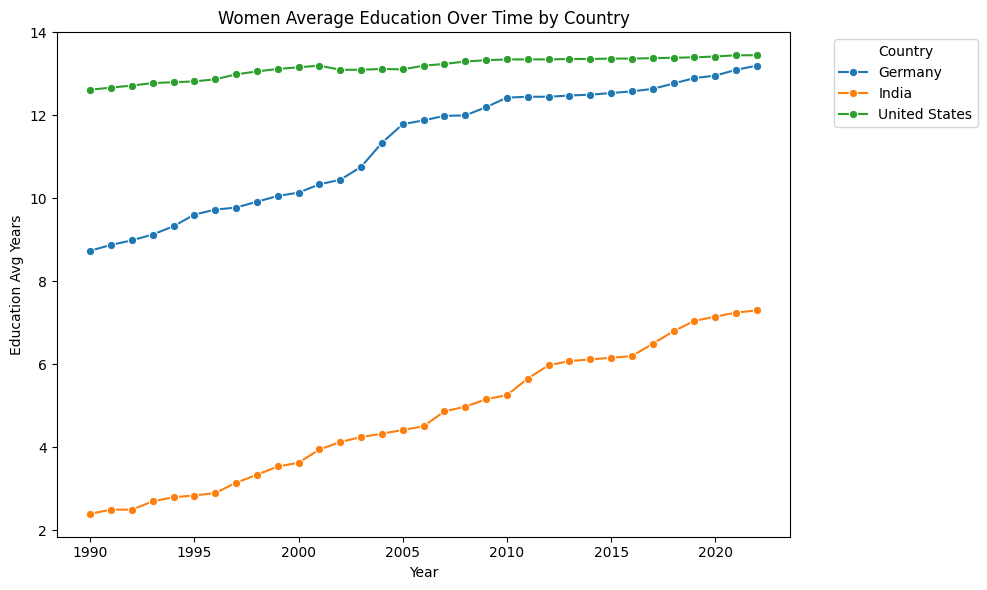

In [17]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_we, x='Year', y='we_avg_yr', hue='Entity', marker='o')

# Title and labels
plt.title('Women Average Education Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Education Avg Years')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Change in fertility rate over time

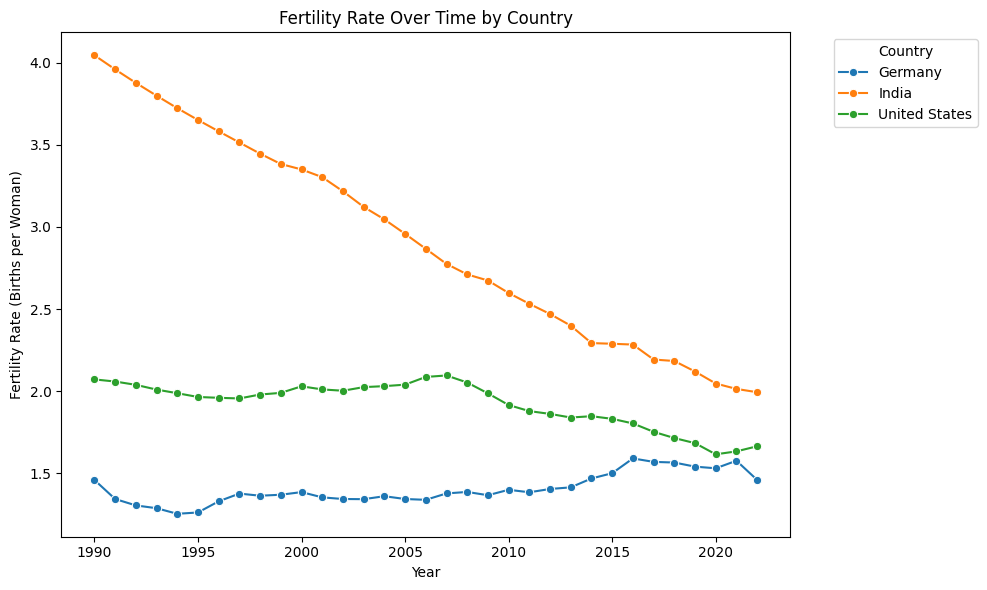

In [18]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_fr, x='Year', y='fr', hue='Entity', marker='o')

# Title and labels
plt.title('Fertility Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (Births per Woman)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Change in GDP - PPP over time

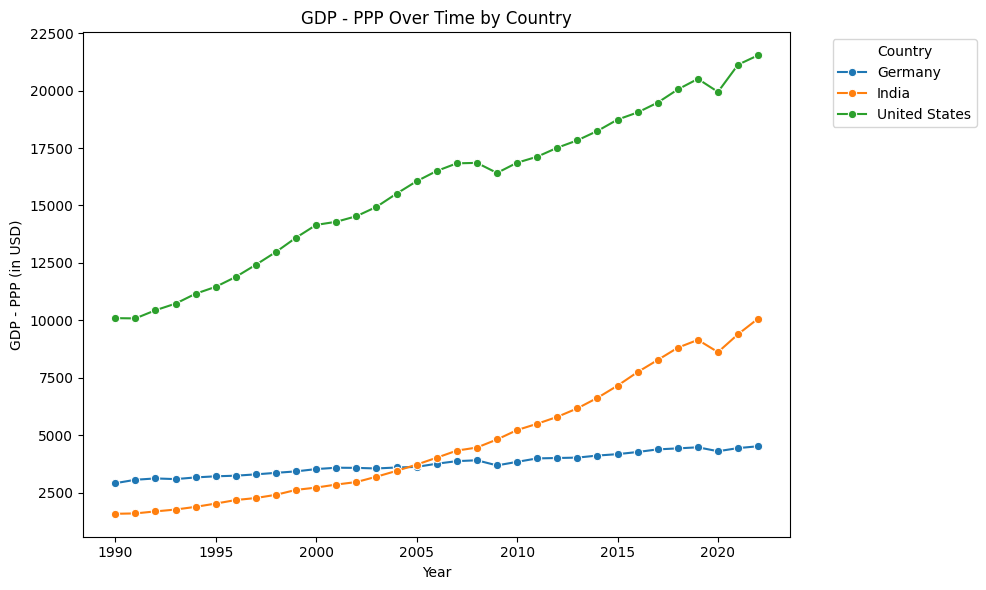

In [19]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_gdp, x='Year', y='gdp_ppp', hue='Entity', marker='o')

# Title and labels
plt.title('GDP - PPP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP - PPP (in USD)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Change in Youth median age over time

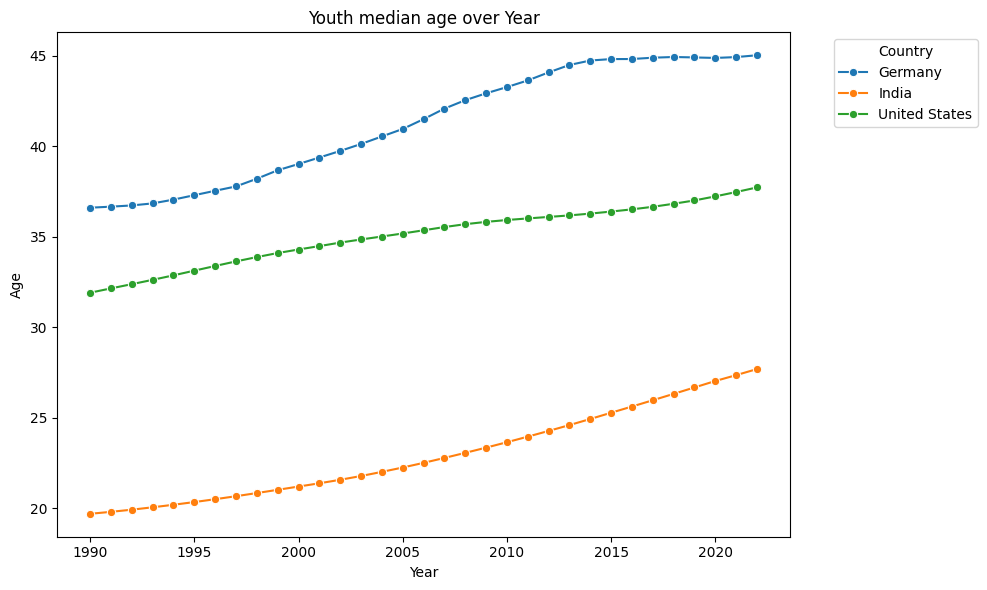

In [20]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_age, x='Year', y='median_age', hue='Entity', marker='o')

# Title and labels
plt.title('Youth median age over Year')
plt.xlabel('Year')
plt.ylabel('Age')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [21]:
print(merged_df.to_string())

           Entity  Year  we_avg_yr     fr  median_age       gdp_ppp
0         Germany  1990       8.74  1.460      36.600   2915.150994
1         Germany  1991       8.88  1.344      36.658   3064.064531
2         Germany  1992       8.99  1.305      36.726   3122.988838
3         Germany  1993       9.13  1.288      36.838   3092.481927
4         Germany  1994       9.33  1.254      37.047   3166.450757
5         Germany  1995       9.61  1.262      37.292   3215.345395
6         Germany  1996       9.73  1.330      37.536   3241.255385
7         Germany  1997       9.78  1.377      37.776   3299.343894
8         Germany  1998       9.92  1.364      38.200   3365.790462
9         Germany  1999      10.06  1.370      38.669   3429.311718
10        Germany  2000      10.14  1.386      39.015   3529.190523
11        Germany  2001      10.34  1.354      39.373   3588.532750
12        Germany  2002      10.45  1.344      39.737   3581.428394
13        Germany  2003      10.76  1.343      4

In [22]:
merged_df.to_csv(artifacts_path+'eco-1990-2022.csv',index=False)

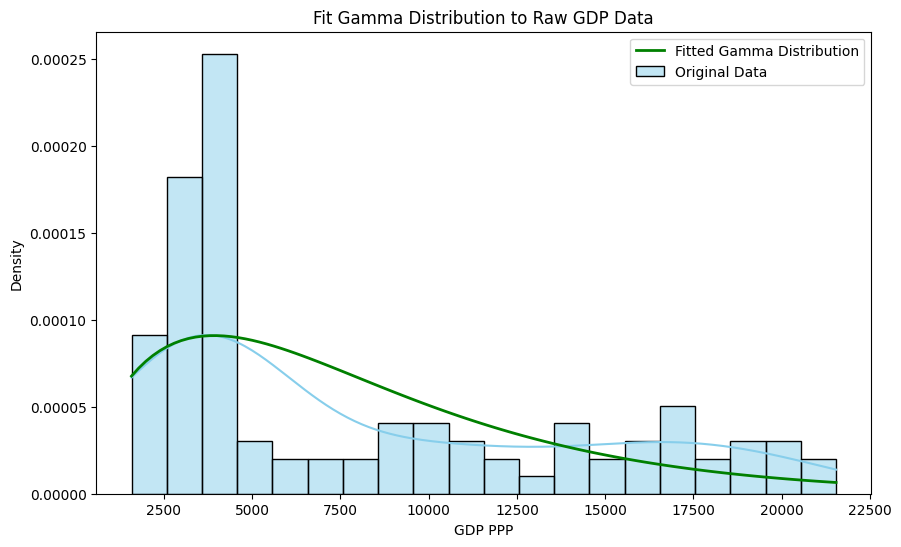

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

# Assuming 'merged_df' is your dataframe and 'gdp_ppp' is the column of interest
gdp_data = merged_df['gdp_ppp']

# Fit the Gamma distribution to the raw GDP data (without log transformation)
shape, loc, scale = gamma.fit(gdp_data, floc=0)  # Fix location at 0 for fitting

# Plot the histogram of original data and the fitted Gamma distribution
plt.figure(figsize=(10, 6))

# Plot histogram of original GDP data
sns.histplot(gdp_data, kde=True, color='skyblue', bins=20, stat='density', label='Original Data')

# Plot the PDF of the fitted Gamma distribution
x = np.linspace(gdp_data.min(), gdp_data.max(), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_fitted, color='green', label='Fitted Gamma Distribution', linewidth=2)

# Title and labels
plt.title('Fit Gamma Distribution to Raw GDP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


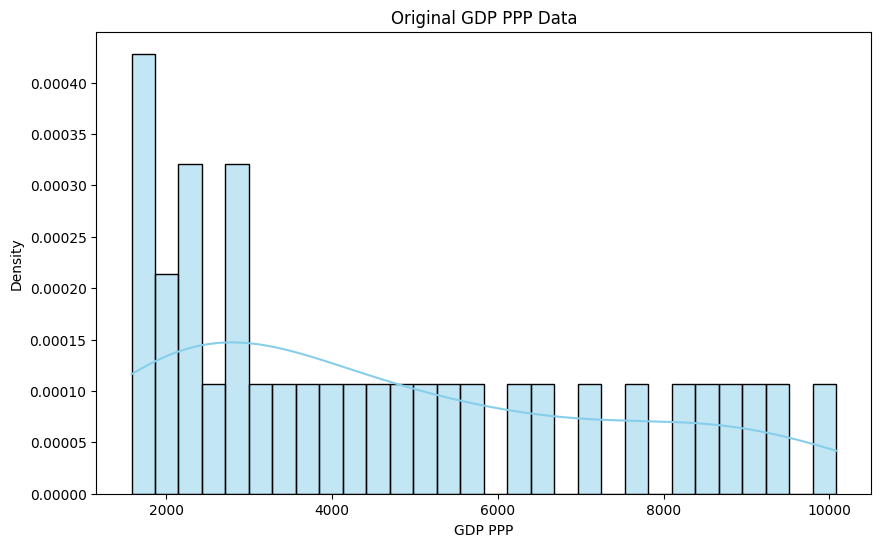

Skewness of original data: 0.6018703300237841
Box-Cox transformation lambda: 0.0018757396148707081


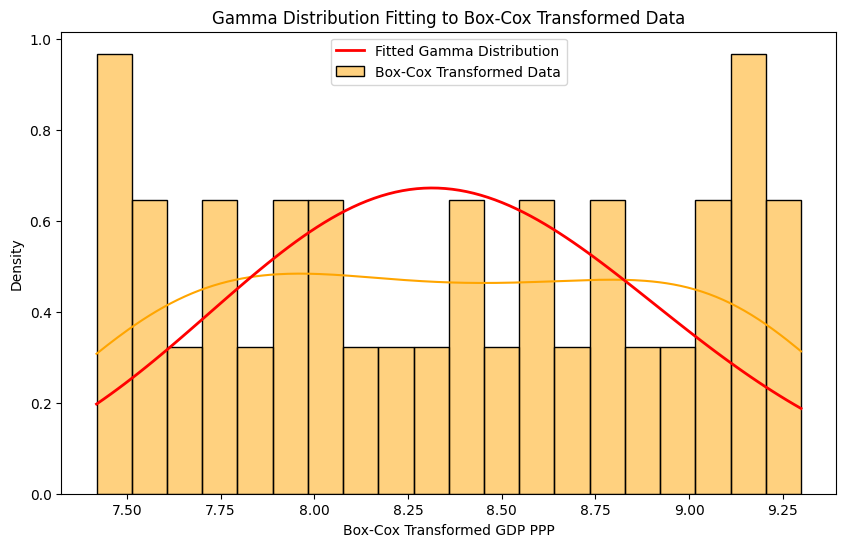

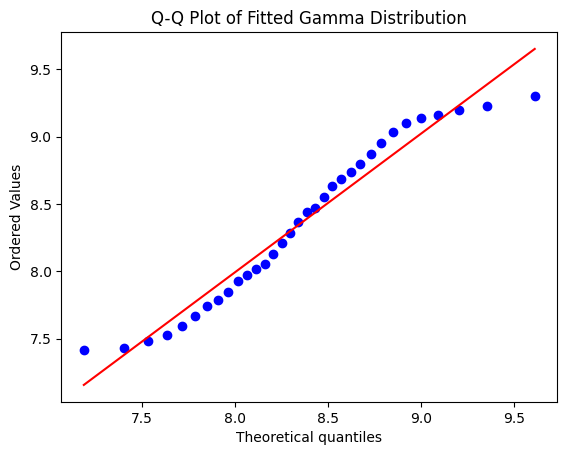

In [50]:
# Assuming 'merged_df' is your dataframe and 'gdp_ppp' is the column of interest
gdp_data = merged_df[merged_df['Entity'] == 'India']['gdp_ppp']

plt.figure(figsize=(10, 6))
sns.histplot(gdp_data, kde=True, color='skyblue', bins=30, stat='density')
plt.title('Original GDP PPP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.show()

# Check skewness of the data
print(f"Skewness of original data: {gdp_data.skew()}")

# Box-Cox transformation (data > 0)
gdp_data_boxcox, lambda_value = boxcox(gdp_data + 1)  # Adding 1 to avoid log(0)
print(f"Box-Cox transformation lambda: {lambda_value}")

# Fit Gamma distribution to Box-Cox transformed data
shape, loc, scale = gamma.fit(gdp_data_boxcox, floc=0)

# Generate the PDF for the fitted Gamma distribution
x = np.linspace(min(gdp_data_boxcox), max(gdp_data_boxcox), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)

# Plot the histogram of the transformed data and the fitted Gamma distribution
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data_boxcox, kde=True, color='orange', bins=20, stat='density', label='Box-Cox Transformed Data')
plt.plot(x, pdf_fitted, color='red', label='Fitted Gamma Distribution', linewidth=2)
plt.title('Gamma Distribution Fitting to Box-Cox Transformed Data')
plt.xlabel('Box-Cox Transformed GDP PPP')
plt.ylabel('Density')
plt.legend()
plt.show()

# 6. Check for goodness of fit (e.g., using Q-Q plot)
stats.probplot(gdp_data_boxcox, dist="gamma", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot of Fitted Gamma Distribution')
plt.show()



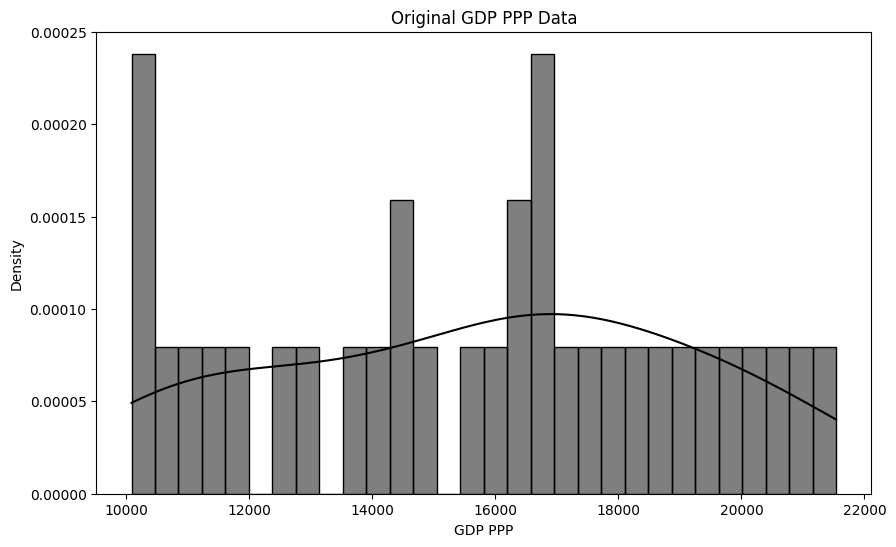

Skewness of original data: -0.13167043590154706
Box-Cox transformation lambda: 1.1047053904062325


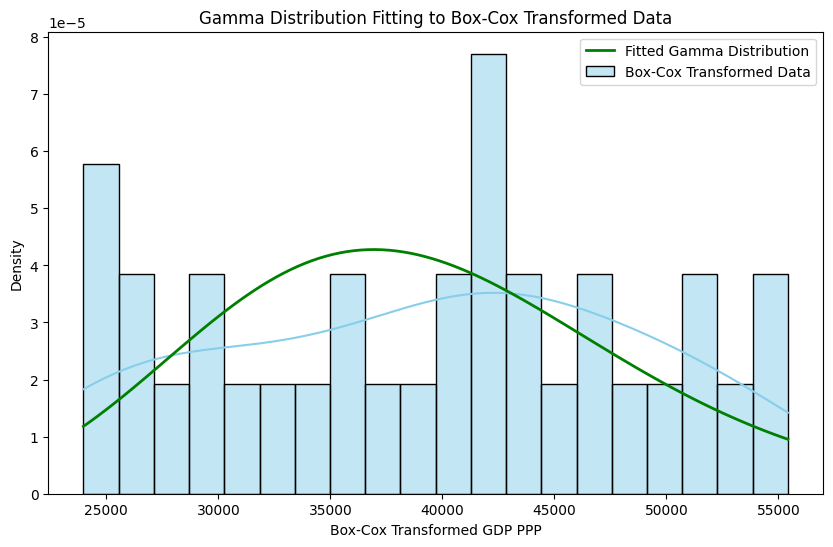

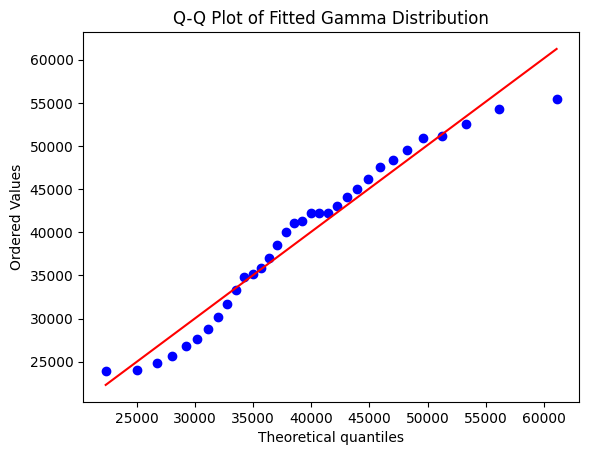

In [60]:
gdp_data = merged_df[merged_df['Entity'] == 'United States']['gdp_ppp']
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data, kde=True, color='black',bins=30, stat='density')
plt.title('Original GDP PPP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.show()
print(f"Skewness of original data: {gdp_data.skew()}")
gdp_data_boxcox, lambda_value = boxcox(gdp_data + 1)  # Adding 1 to avoid log(0)
print(f"Box-Cox transformation lambda: {lambda_value}")
shape, loc, scale = gamma.fit(gdp_data_boxcox, floc=0)
x = np.linspace(min(gdp_data_boxcox), max(gdp_data_boxcox), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data_boxcox, kde=True, color='skyblue', bins=20, stat='density', label='Box-Cox Transformed Data')
plt.plot(x, pdf_fitted, color='green', label='Fitted Gamma Distribution', linewidth=2)
plt.title('Gamma Distribution Fitting to Box-Cox Transformed Data')
plt.xlabel('Box-Cox Transformed GDP PPP')
plt.ylabel('Density')
plt.legend()
plt.show()
stats.probplot(gdp_data_boxcox, dist="gamma", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot of Fitted Gamma Distribution')
plt.show()

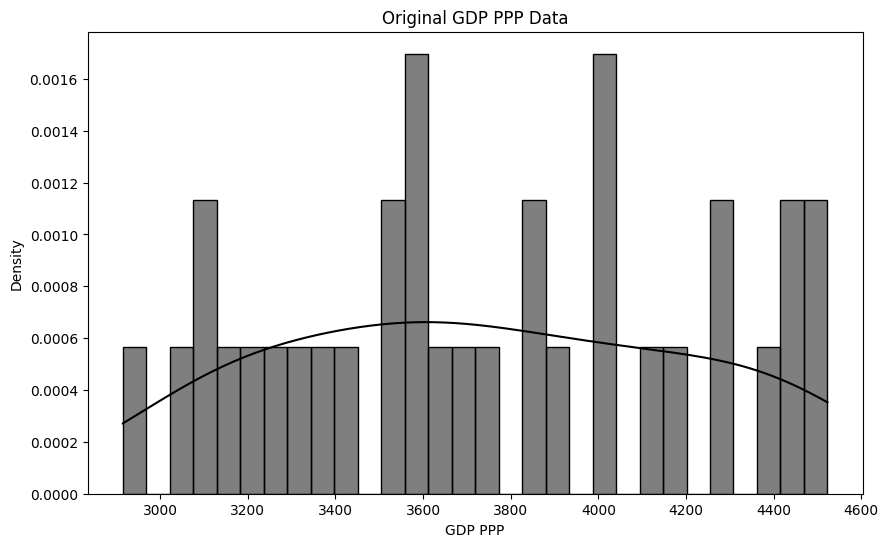

Skewness of original data: 0.06079984256513803
Box-Cox transformation lambda: 0.4989744927697372


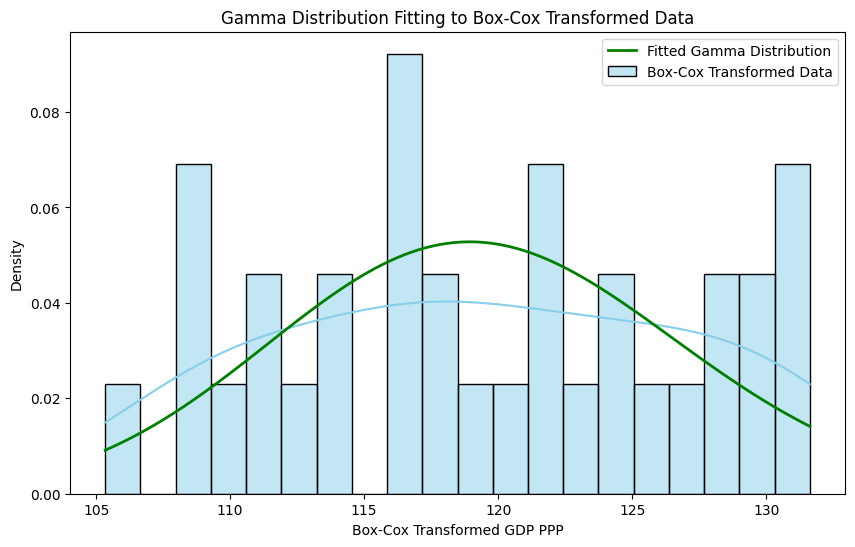

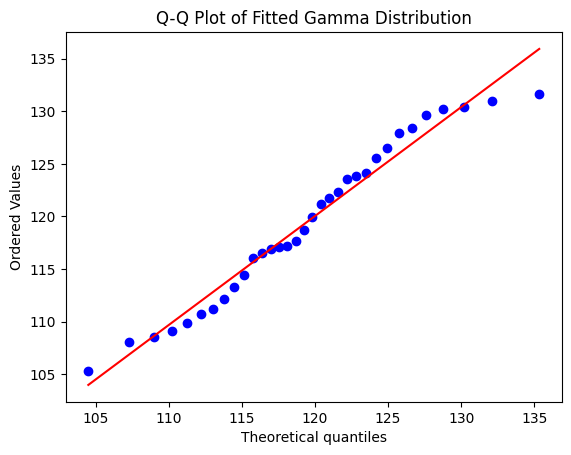

In [61]:
gdp_data = merged_df[merged_df['Entity'] == 'Germany']['gdp_ppp']
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data, kde=True, color='black',bins=30, stat='density')
plt.title('Original GDP PPP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.show()
print(f"Skewness of original data: {gdp_data.skew()}")
gdp_data_boxcox, lambda_value = boxcox(gdp_data + 1)  # Adding 1 to avoid log(0)
print(f"Box-Cox transformation lambda: {lambda_value}")
shape, loc, scale = gamma.fit(gdp_data_boxcox, floc=0)
x = np.linspace(min(gdp_data_boxcox), max(gdp_data_boxcox), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data_boxcox, kde=True, color='skyblue', bins=20, stat='density', label='Box-Cox Transformed Data')
plt.plot(x, pdf_fitted, color='green', label='Fitted Gamma Distribution', linewidth=2)
plt.title('Gamma Distribution Fitting to Box-Cox Transformed Data')
plt.xlabel('Box-Cox Transformed GDP PPP')
plt.ylabel('Density')
plt.legend()
plt.show()
stats.probplot(gdp_data_boxcox, dist="gamma", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot of Fitted Gamma Distribution')
plt.show()